In [1]:
#This was a homework assignment for my data analytics course where I conduced an association analysis using the apriori algorithm.
#Martha Czernuszenko

From assignment: The data we'll use comes from a bakery called "The Bread Basket", located in the historic center of Edinburgh. The dataset contains more than 9000 transactions from the bakery. The file contains the following columns:

- Date. Categorical variable that tells us the date of the transactions (YYYY-MM-DD format). The column includes dates from 2016-10-30 to 2017-04-09.

- Time. Categorical variable that tells us the time of the transactions (HH:MM:SS format).

- Transaction. Quantitative variable that allows us to differentiate the transactions. The rows that share the same value in this field belong to the same transaction.

- Item. Categorical variable with the products purchased.

## Installation
`scikit-learn` does not provide any functionality for association rule mining so for this assignment you will be using the `MLxtend` library. The documentation for this library is available [here](http://rasbt.github.io/mlxtend/).

You will need to install the `MLxtend` library. There are several ways of doing this; you can follow the instructions below, or see the setup guide  [here](http://rasbt.github.io/mlxtend/installation/).


### Conda

Most of you should use Conda to do the install. If you downladed Anaconda in order to get Jupyter Notebooks (which is the most common way to get Jupyter Notebooks), then you will want to install `MLxtend` using Conda. 

Open a command prompt / terminal window and type:

`conda install mlxtend --channel conda-forge`

### PyPi

You can also install via pip. Note: If you are running Jupyter notebooks through an Anaconda install, then pip may not place the `MLxtend` libraries in the correct place for use in Jupyter. 

Open a command prompt / terminal window and type:

`pip3 install mlxtend`


## Apriori Algorithm

The Apriori algorithm is a classical algorithm in data mining. It is used for mining frequent itemsets and relevant association rules. In this part, you'll be running this algorithm for generating the itemsets that occur more than the `min_sup` threshold. Based on these frequent itemsets you'll find association rules that have confidence above the `min_conf` threshold.

In [2]:
# Standard imports (you can add additional headers if you wish)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [3]:
%matplotlib inline

In [4]:
# Reading the dataset from file
def load_dataset(file_name):
    with open(file_name, 'r') as f:
        content = f.readlines()[1:]
    transactions = []
    prev_tid = -1
    for t in content:
        t = t.strip().split(',')[-2:]
        tid = t[0]
        item = t[1]
        if prev_tid != tid:
            prev_tid = tid
            transactions.append([item])
        else:
            transactions[-1].append(item)
    return transactions

In [5]:
dataset = load_dataset('BreadBasket_DMS.csv')
#dataset is a 2D list
print("Num transactions:", len(dataset))
#Print the first 10 transactions
dataset[:10]

Num transactions: 9531


[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna']]

**Q1.** Many transactions in the dataset include the item "NONE." First, find and remove all the "NONE" items from the dataset.

Once you have removed the NONEs, find the top 10 best-selling items in the bakery. Create a bar chart to display the total number of transactions for each of the top 10 selling items. Sort the bar chart by frequency (the top most sold item first, down to the 10th most sold item).

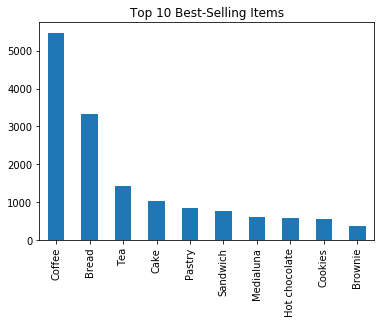

In [6]:
#find all the NONE and remove them
# I made the assumption that item only appears once in a basket - as we learned in class 
# Convert dataset into list for graphing purposes 
cleanforgraph = []
for i in range(len(dataset)):
    for j in range(len(dataset[i])):
        if dataset[i][j] !="NONE":
            cleanforgraph.append(dataset[i][j])
            
#Convert list into dataframe so I can graph it           
dfObj = pd.DataFrame(cleanforgraph, columns=['items']) 
dfObj
top_10_selling_items = dfObj['items'].value_counts()[:10].plot(kind='bar',title = "Top 10 Best-Selling Items")

In [7]:
#Need to make a 2-D array for the structure for the next problem
#Part 2
cleandataset = []
for i in range(len(dataset)):
    innerlist = []
    for j in range(len(dataset[i])):
        if dataset[i][j] !="NONE":
            innerlist.append(dataset[i][j])
    cleandataset.append(innerlist)
        
#Check if it's clean
print(dataset[10])
print(cleandataset[10])

#Remove empty lists
finaldataset = [x for x in cleandataset if x != []]

#Check final length
print("New number of transactions",len(finaldataset))

['Bread', 'Medialuna', 'Bread', 'NONE']
['Bread', 'Medialuna', 'Bread']
New number of transactions 9465


**Q2.** 

a.) Using `mlxtend.preprocessing.TransactionEncoder` transform `dataset` into an array format suitable for the `mlxtend` library. You will need to call `fit` then `transform`. 

`TransactionEncoder` learns unique items from the dataset and transforms each transaction into a one-hot encoded boolean numpy array. For example, the resulting encoded dataset will be represented by something like this, where each row is a transaction. If the first transaction contained ['Crepe', 'Jam'], this would correspond to the first row in the encoded table. 

<img src="table.png">

Print the `shape` of the resulting encoded numpy array.

b.) `TransactionEncoder` also has a function `inverse_transform` that allows you to tranform one-hot encoded transactions back to the item labels. Try it out on the first 5 transactions and display the items in the first 5 transactions.

In [8]:
#Create transaction encoder
te = TransactionEncoder()
#Fit and transform
te_ary = te.fit(finaldataset).transform(finaldataset)
#Print the shape of the array
print(te_ary.shape)

#Display first 5
first5 = te_ary[:5]
te.inverse_transform(first5)


(9465, 94)


[['Bread'],
 ['Scandinavian'],
 ['Cookies', 'Hot chocolate', 'Jam'],
 ['Muffin'],
 ['Bread', 'Coffee', 'Pastry']]

**Q3.** Convert the encoded numpy array from Q2 part a into a pandas dataframe. Use the `TransactionEncoder`'s `.columns_` attribute as the column headers. Print the head of the resulting dataframe. 

In [9]:
#Convert into a Dataframe
newdf = pd.DataFrame(te_ary,columns=te.columns_)
newdf.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Q4.** Use the `mlxtend.frequent_patterns.apriori` to generate the frequent itemsets with minimum support of 1%. Display these itemsets along with their support values.

In [10]:
#Featured with itemsets
apriori(newdf,min_support=.01)

#Displayed with itemset names
freq_itemsets = apriori(newdf,min_support=.01,use_colnames=True)
freq_itemsets

,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
5,0.012995,(Chicken Stew)
6,0.478394,(Coffee)
7,0.019440,(Coke)
8,0.054411,(Cookies)
9,0.039197,(Farm House)


Q5. Using the frequent itemsets and support counts in Q4, find and display all the maximal frequent itemsets along with their support fraction. Also print a count of how many maximal frequent itemsets you have found.

In [11]:
#Need to make a copy because I'm using frequent itemsets in later questions
find_max_freq_itemsets = freq_itemsets.copy(deep=True)
#print(find_max_freq_itemsets)

#Maximal frequent itemset is defined as a frequent itemset for which none of its immediate supersets are frequent. 
#I need to drop any itemsets that are subsets.
#Set the baseline of the original length
print("Original length",len(find_max_freq_itemsets))

#First loop is to get the itemsets- used iterrows to iterate over rows in dataframe 
for index, row in find_max_freq_itemsets.iterrows():
    #print("Index",index) #standard index of just 1,2,3,4 etc. need to drop
    #print("Row",row) # gives info on support and itemset
    #need to drop index 
    check_itemset = freq_itemsets.drop(index)
    itemset = row['itemsets']
    #print("THIS IS row['itemsets']",row['itemsets'])
    #print("Itemset",itemset)
    
    #Second loop is to check if itemset is a subset of the itemset
    for check_index, check_row in check_itemset.iterrows():
        #print(check_row['itemsets'])
        #print(itemset)
        #Check if it's a subset 
        if itemset.issubset(check_row['itemsets']):
            #Drop the subset
            find_max_freq_itemsets = find_max_freq_itemsets.drop(index)
            #print("Hit break")-found subset 
            break; #go to outer-loop 
            
print("Maximal Count",len(find_max_freq_itemsets))
print(find_max_freq_itemsets)

Original length 61
Maximal Count 37
     support                  itemsets
1   0.016059                (Baguette)
5   0.012995            (Chicken Stew)
7   0.019440                    (Coke)
9   0.039197              (Farm House)
10  0.015003                   (Fudge)
11  0.010565       (Hearty & Seasonal)
13  0.015003                     (Jam)
14  0.013207          (Jammie Dodgers)
17  0.014157           (Mineral water)
20  0.010460                   (Salad)
22  0.029054            (Scandinavian)
27  0.015425                  (Tiffin)
29  0.020285                (Truffles)
30  0.010354        (Bread, Alfajores)
31  0.019651       (Coffee, Alfajores)
32  0.010777          (Bread, Brownie)
35  0.014474          (Bread, Cookies)
36  0.013418    (Bread, Hot chocolate)
37  0.016904        (Bread, Medialuna)
39  0.017010         (Bread, Sandwich)
40  0.028104              (Bread, Tea)
41  0.019651         (Coffee, Brownie)
43  0.011410     (Hot chocolate, Cake)
45  0.028209         (Coffee

**Q6.** Using the frequent itemsets and support counts in Q4, find all the closed frequent itemsets along with their support fraction. Also print a count of how many closed frequent itemsets you have found.

In [12]:
#Closed itemsets provide minimal representation of itemsets without losing their support information

#Need to find a way to keep the support info the same - probably can use same structure above but isn't of checking for maximal, I need to see if support counts are the same and if they are a subset
find_closed_freq_itemsets = freq_itemsets.copy(deep=True)

#Set baseline- of the original length
print("Original length",len(find_closed_freq_itemsets))
#First loop to get the items- used iterrows to iterate over rows in dataframe
for index, row in find_closed_freq_itemsets.iterrows():
    #print("Index",index) #standard index of just 1,2,3,4 etc. need to drop
    #print("Row",row) # gives info on support and itemset
    #Drop index
    check_itemset = freq_itemsets.drop(index)
    #print(check_itemset)
    itemset = row['itemsets']
    #print(itemset)
    #print("THIS IS row['itemsets']",row['itemsets'])
    #print("Itemset",itemset)    
    #Second loop to check if the support count is the same, if it is then remove from the itemsets
    for check_index, check_row in check_itemset.iterrows():
        #print(check_row['itemsets'])
        #print(itemset)        
        #Need to make sure that is a subset - For an example, Fudge and Jam have the same support count of .015003, but they are not subsets - this is NOT a candidate for closed! 
        if itemset.issubset(check_row['itemsets']):
            #print("ROWSUPPORT",row['support'])
            #print("CHECK_ROWSUPPORT", check_row['support'])
            #If they are equal
            if row['support'] == check_row['support']:
                #Drop from the itemset if it has the same support count
                find_closed_freq_itemsets = find_closed_freq_itemsets.drop(index)          
                break; #go to outer loop                
#Print the length and the closed itemsets
print("Closed Count",len(find_closed_freq_itemsets))    
print(find_closed_freq_itemsets)


Original length 61
Closed Count 61
     support                  itemsets
0   0.036344               (Alfajores)
1   0.016059                (Baguette)
2   0.327205                   (Bread)
3   0.040042                 (Brownie)
4   0.103856                    (Cake)
5   0.012995            (Chicken Stew)
6   0.478394                  (Coffee)
7   0.019440                    (Coke)
8   0.054411                 (Cookies)
9   0.039197              (Farm House)
10  0.015003                   (Fudge)
11  0.010565       (Hearty & Seasonal)
12  0.058320           (Hot chocolate)
13  0.015003                     (Jam)
14  0.013207          (Jammie Dodgers)
15  0.038563                   (Juice)
16  0.061807               (Medialuna)
17  0.014157           (Mineral water)
18  0.038457                  (Muffin)
19  0.086107                  (Pastry)
20  0.010460                   (Salad)
21  0.071844                (Sandwich)
22  0.029054            (Scandinavian)
23  0.034548                 

**Q7.** Use `mlxtend.frequent_patterns.association_rules` to calculate rules with a confidence level of 0.25 for the frequent itemsets you generated in Q4.

In [13]:
from mlxtend.frequent_patterns import association_rules
#set threshold to .25
association_rules(freq_itemsets, metric="confidence", min_threshold=0.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Bread),0.036344,0.327205,0.010354,0.284884,0.870657,-0.001538,0.940818
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
2,(Brownie),(Bread),0.040042,0.327205,0.010777,0.269129,0.822508,-0.002326,0.920538
3,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561
4,(Cookies),(Bread),0.054411,0.327205,0.014474,0.266019,0.813004,-0.003329,0.916638
5,(Medialuna),(Bread),0.061807,0.327205,0.016904,0.273504,0.835879,-0.003319,0.926082
6,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
7,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293
8,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
9,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


**Q8.** An important step in generating a set of association rules is to determine the optimal thresholds for support and confidence. If we set these values too low we will get a lot of rules and most of them will not be useful. Generate the frequent itemsets with minimum support of 0.5% and plot the number of rules generated with respect to the confidence threshold by varying its value between 0 and 1 with increments of 0.1. What happens when we increase the confidence level? Why?

AxesSubplot(0.125,0.125;0.775x0.755)


,Confidence,Rule Count
0,0.0,194
1,0.1,103
2,0.2,57
3,0.3,35
4,0.4,25
5,0.5,17
6,0.6,4
7,0.7,2
8,0.8,1
9,0.9,0


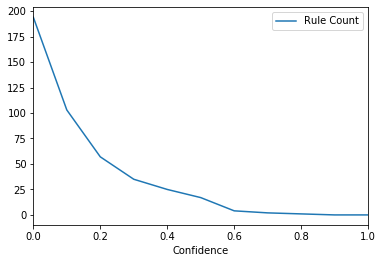

In [14]:
#Set min_support threshold to .005
new_freq_itemsets = apriori(newdf,min_support=.005,use_colnames=True)
new_freq_itemsets

#Set confidence to 0, 
confidence = 0
#Created a list to store rule count somwhere
count_rules =[]
#While loop to iterate over until confidence is equal to 1 
while confidence <= 1:
    #Find the number of rules 
    rules = association_rules(new_freq_itemsets, metric="confidence", min_threshold= confidence)
    #print(confidence)
    #print(rules)
    #add the number of rules to the list
    count_rules.append(len(rules))
    #Increase 
    confidence += .1 
#Create data columns  
data = {'Confidence':[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1],'Rule Count':count_rules}
#Create dataframe
optimal_threshold_df = pd.DataFrame(data)
optimal_threshold_df

"""As confidence increases, the number of rules decrease because less rules meet the confidence threshold.For an example,at a .1 confidence threshold there are 103 rules that are met.
However, once we increase that threshold to .4, only 25 rules are met.
Rules that meet a higher confidence threshold are stronger becuase weak rules don't meet the threshold."""

#Show the graph
print(optimal_threshold_df.plot(x='Confidence',y='Rule Count'))
#show the table 
optimal_threshold_df

**Q9.** What value would you choose for the minimum confidence threshold based on the plot in Q8? Why? Display the rules generated for your chosen value. Take a look at the generated rules. Are they interesting? Why/why not?

In [15]:
final_rules = association_rules(new_freq_itemsets, metric="confidence", min_threshold= .6)

#Min_threshold .3 has all lift above 1 but are small
#Min_thresold .7 has only 2 rules -that people buy coffee with toast (seems like common sense)
'''
When evaluating differnet thresholds, I first wanted to see which rules were strong. When I used a min threshold of
.3, I saw many differnt rules, but they didn't have many super strong lifts since some lifts were under 1 and showed a 
negative correlation. When I looked at a min threshold of .7, I saw only 2 rules and one of them was that people buy
coffee with toast (which seems like common sense).

Therefore, I decided to go with the min_threshold of .6 because there was a natural break between 17 to 4 rules to 
show that these were super strong rules. However, the generated rules are not that interesting. Most of the rules just 
show that people buy coffee at the bakery. However, with the threshold of .6, I'm able to find an interesting rule that 
people who buy salad also buy a coffee which seems a bit unique. 
'''
final_rules



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Keeping It Local),(Coffee),0.006656,0.478394,0.005388,0.809524,1.692169,0.002204,2.738431
1,(Salad),(Coffee),0.010460,0.478394,0.006550,0.626263,1.309094,0.001547,1.395648
2,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
3,"(Hot chocolate, Cake)",(Coffee),0.011410,0.478394,0.006867,0.601852,1.258067,0.001409,1.310080
